<a href="https://colab.research.google.com/github/jpopineda10433696/Projeto-Aplicado-I/blob/main/Projeto_Aplicado_I_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação da Análise

## Importação das Bibliotecas

In [ ]:
# Importação das bibliotecas 'pandas' e 'matplotlib' para análise, manipulação do dataframe e criação de visuais.

import pandas as pd
import matplotlib.pyplot as plt

## Extração e Tratamento dos Dados

In [ ]:
# Extração de dados via repositório do GitHub do projeto.

url= 'https://github.com/jpopineda10433696/Projeto-Aplicado-I/raw/refs/heads/main/Kick%20Off/Homicidio_2017_2022.xlsx'

# Criação dos dataframes de cada planilha presente na base de dados.

df1=pd.read_excel(url,sheet_name='2017')
df2=pd.read_excel(url,sheet_name='2018')
df3=pd.read_excel(url,sheet_name='2019')
df4=pd.read_excel(url,sheet_name='2020')
df5=pd.read_excel(url,sheet_name='2021')
df6=pd.read_excel(url,sheet_name='2022')

In [ ]:
# Concatenação dos dados em um único dataframe (df).

df = pd.concat([df1,df2,df3,df4,df5,df6])

In [ ]:
# Transformação dos tipos de dados da coluna "IDADE_PESSOA" para inteiro

df['IDADE_PESSOA'] = pd.to_numeric(df['IDADE_PESSOA'], errors = 'coerce')

# Convertendo valores da coluna 'ID_DELEGACIA' para tipo string, evitando medidas estatísticas incoerentes.

df['ID_DELEGACIA'] = df['ID_DELEGACIA'].astype(str)

# Conversão dos valores de 'HORA_FATO' para tipo 'datetime' e formato hora.

df['HORA_FATO'] = pd.to_datetime(df['HORA_FATO'], format='%H:%M:%S', errors='coerce').dt.hour

# Extração de valores de MÊS e ANO da coluna 'DATA_FATO'

df['ANO'] = df['DATA_FATO'].dt.year
df['MÊS'] = df['DATA_FATO'].dt.month

In [ ]:
# Filtrando valores residuais do ano de 2016

df = df[df['ANO'] != 2016]

## Características do Dataset


In [ ]:
# Cabeçalho do dataset

df.head()

In [ ]:
# Informações sobre nomes das colunas do dataset, tipos de variáveis, presença de valores nulos e número de linhas e colunas.

df.info()

### Valores Nulos

In [ ]:
#Número de valores nulos por coluna - será importante para verificarmos se é uma informação crítica sobre a vítima ou do crime que esteja faltando.
print("\nNúmero de valores nulos por coluna:")
print(df.isnull().sum())


Número de valores nulos por coluna:
DEPARTAMENTO_CIRCUNSCRICAO       0
SECCIONAL_CIRCUNSCRICAO          0
MUNICIPIO_CIRCUNSCRICAO          0
DP_CIRCUNSCRICAO                 0
HD                             908
Nº DE VÍT HD                     0
ID_DELEGACIA                     0
MÊS ESTATISTICA                  0
ANO ESTATISTICA                  0
DATAHORA_REGISTRO_BO             0
NUM_BO                           0
ANO_BO                           0
MUNICIPIO_ELABORACAO             0
DP_ELABORACAO                    0
SEC_ELABORACAO                   0
DEP_ELABORACAO                   0
DATA_FATO                        0
HORA_FATO                     1631
DESC_TIPOLOCAL                   6
LOGRADOURO                       0
NUMERO_LOGRADOURO             4285
LATITUDE                      5161
LONGITUDE                     5160
TIPO_PESSOA                      0
SEXO_PESSOA                      0
IDADE_PESSOA                  2039
DATA_NASCIMENTO_PESSOA        2204
COR_PELE          


### Estatísticas Principais

In [ ]:
# Exploração das principais medidas estatísticas de cada coluna da base de dados.

df.describe()

# Análise Exploratória dos Dados

## Idade das Vítimas

In [ ]:
# Medidas estatísticas sobre a idade das vítimas presentes no relatório.

df['IDADE_PESSOA'].describe()

,IDADE_PESSOA
count,16397.000000
mean,35.304873
std,13.552341
min,0.000000
25%,25.000000
50%,34.000000
75%,43.000000
max,99.000000


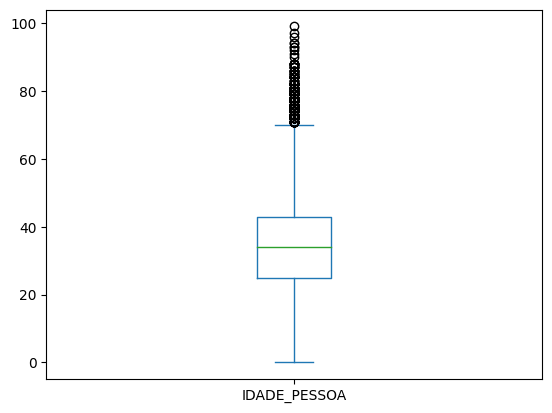

In [ ]:
# Construção de boxplot para verificar a distribuição de idades da coluna 'IDADE_PESSOA'.

idade_boxplot = df['IDADE_PESSOA'].dropna().plot(kind='box')

Conforme o gráfico acima, é possível observar uma média aproximada de 35 anos de idade das vítimas de homicídio no estado de SP, sendo que 75% dos dados dessa amostra são de pessoas de até 43 anos de idade.



Além disso, é importante salientar a presença de outliers ao observar dados de vítimas com idades mais avançadas (aproximadamente acima dos 70 anos)

## Ano da Ocorrência

In [ ]:
# Contagem de valores por ano de ocorrência do crime.

df['ANO'].value_counts()

,count
ANO,
2017,3504
2018,3108
2022,3043
2020,3038
2019,2904
2021,2839


<Axes: xlabel='ANO'>

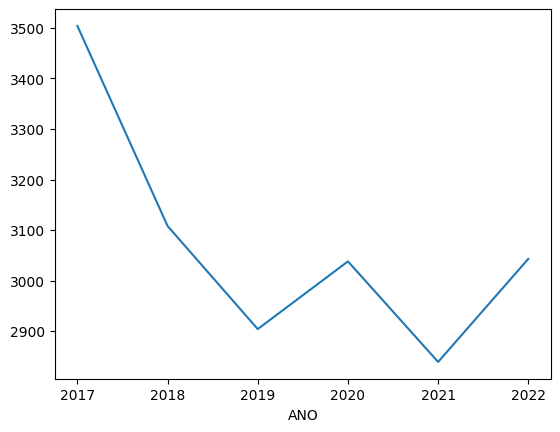

In [ ]:
# Plotagem do gráfico de linhas para observar uma visão temporal do número de crimes por ano de ocorrência.

df['ANO'].value_counts().sort_index().plot(kind='line')

É possível observar uma queda no número de homicídios no estado de SP desde o ano de 2017, com um pico no ano de 2020 e tendência de aumento em 2022.


## Hora da Ocorrência

In [ ]:
# Contagem de valores por hora da ocorrência.

df['HORA_FATO'].value_counts()

,count
HORA_FATO,
21.0,1185
22.0,1164
23.0,1126
20.0,1093
19.0,960
0.0,863
1.0,775
18.0,715
7.0,675


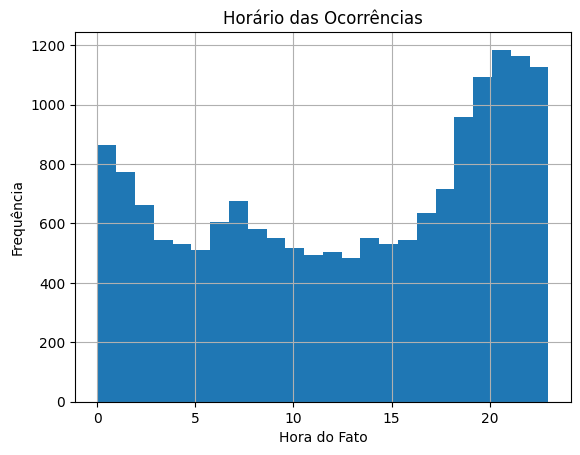

In [ ]:
# Plotagem de um histograma para verificação da frequência de ocorrência dos crimes em cada faixa de horários (classes).

df['HORA_FATO'].hist(bins=24)
plt.xlabel('Hora do Fato')
plt.ylabel('Frequência')
plt.title('Horário das Ocorrências')
plt.show()





É observável que a maioria dos homicídios que ocorreram no período 2017-2022 foram no período da noite, com destaque dos horários entre 20h00 e 23h00.

## Municípios

Text(0.5, 1.0, 'Top 10 Municípios com Mais Ocorrências')

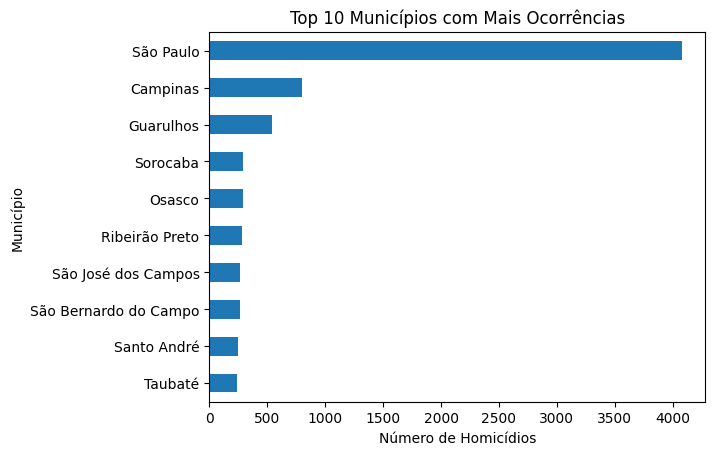

In [ ]:
# Plotagem do gráfico de barras horizontais verificando a ocorrência dos crimes por município.

df['MUNICIPIO_CIRCUNSCRICAO'].value_counts().head(10).plot(kind='barh').invert_yaxis()
plt.xlabel('Número de Homicídios')
plt.ylabel('Município')
plt.title('Top 10 Municípios com Mais Ocorrências')

O número mais expressivo de homicídios ocorridos no período selecionado foi na cidade de São Paulo, representando cerca de 4000 ocorrências no total.

É importante salientar que os 5 primeiros municípios com maior número de crimes
ocorridos estão dentre as 7 cidades mais populosas do estado de São Paulo, o que influencia no número absoluto de homicídios apresentados acima.


## Tipo de Local

Text(0.5, 1.0, 'Top 10 Tipos de Local com Mais Ocorrências')

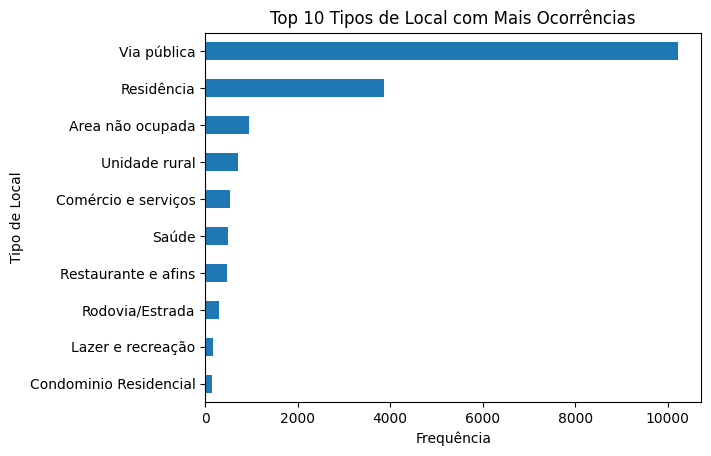

In [ ]:
# Plotagem do gráfico de TOP 10 locais com maior número de homicídios.

df['DESC_TIPOLOCAL'].value_counts().head(10).plot(kind='barh').invert_yaxis()
plt.xlabel('Frequência')
plt.ylabel('Tipo de Local')
plt.title('Top 10 Tipos de Local com Mais Ocorrências')

No gráfico acima, é possível observar que a maior parte dos homicídios ocorridos entre 2017-2022 foram em via pública, mais do que o dobro das ocorrências em locais residenciais.

## Sexo das Vítimas

Text(0.5, 1.0, 'Distribuição de Sexo das Vítimas')

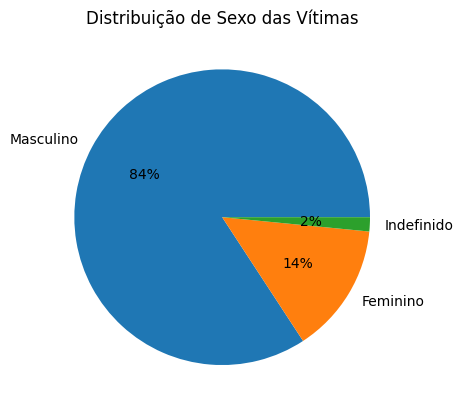

In [ ]:
# Plotagem do gráfico de pizza para observar a distribuição percentual de ocorrência por sexo da vítima.

plt.pie(df['SEXO_PESSOA'].value_counts(), labels=df['SEXO_PESSOA'].value_counts().index, autopct='%1.0f%%')
plt.ylabel('')
plt.title('Distribuição de Sexo das Vítimas')


Dentre os homicídios observados, 84% tem como vítimas pessoas do sexo masculino, seguido por 14% do sexo feminino.

## Cor de Pele

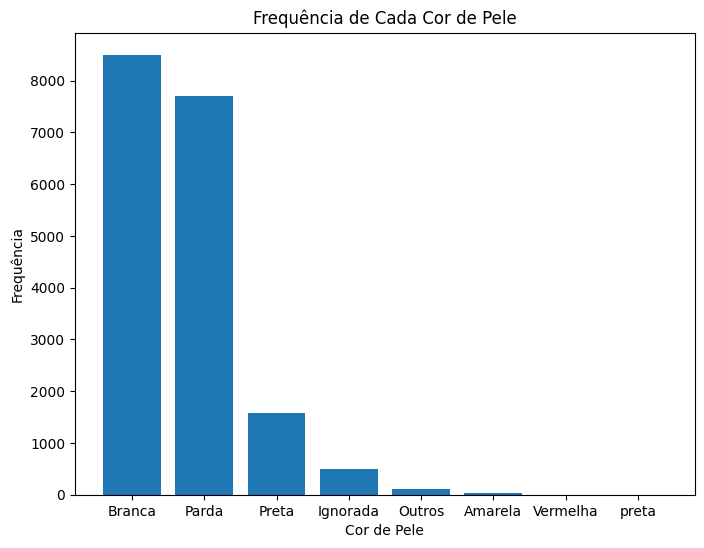

In [ ]:
# Plotagem do gráfico de colunas de ocorrências por cor de pele

plt.figure(figsize=(8, 6))
plt.bar(df['COR_PELE'].value_counts().index, df['COR_PELE'].value_counts())
plt.xlabel('Cor de Pele')
plt.ylabel('Frequência')
plt.title('Frequência de Cada Cor de Pele')
plt.show()

Dentre todos os dados observados, mais de 8500 homicídios ocorridos foram de pessoas de pele branca, seguidos de cerca de 7700 casos de crimes contra pessoas pardas.




## Profissão das Vítimas

In [ ]:
# Cabeçalho de dados de profissão das vítimas.

df['PROFISSAO'].value_counts().head(10)

,count
PROFISSAO,
DESEMPREGADO(A),1224
NAO INFORMADA,1125
ESTUDANTE,1032
AUTONOMO(A),497
AJUDANTE,419
PEDREIRO,383
COMERCIANTE,379
APOSENTADO(A),289
AJUDANTE GERAL,267


Text(0.5, 1.0, 'Top 10 Profissões com Mais Ocorrências')

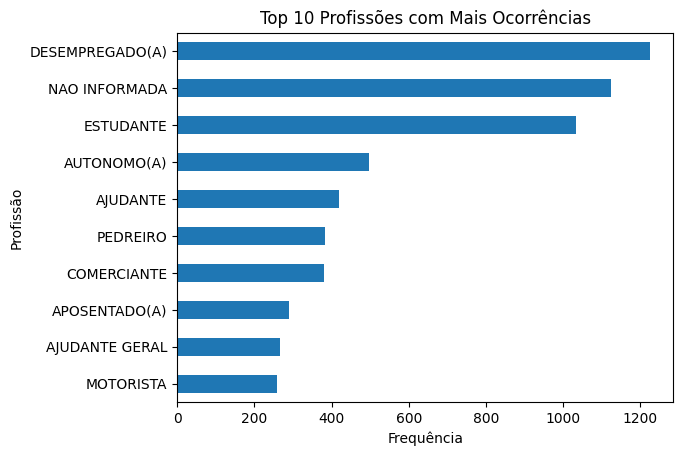

In [ ]:
# Correção de dados com mesmo significado mas com entradas diferentes na base de dados.

df['PROFISSAO'] = df['PROFISSAO'].replace({'DESEMPREGADO': 'DESEMPREGADO(A)'})

# Plotagem do gráfico de barras sobre profissões com mais ocorrências

df['PROFISSAO'].value_counts().head(10).plot(kind='barh').invert_yaxis()
plt.xlabel('Frequência')
plt.ylabel('Profissão')
plt.title('Top 10 Profissões com Mais Ocorrências')

Retirando os casos em que as informações de profissão não foram disponibilizadas, as três maiores ocorrências de homicídios no estado de São Paulo estão distribuídas entre vítimas **desempregadas** (1224), **estudantes** (1032) e **autônomos(as)** (497).